## Results

In [ ]:
import pandas as pd
import numpy as np
import sqlite3
from rq_01_queries import extract_segments_with_buffering
TOTAL_FRAMES = 875_887
FPS = 30
SAMPLE_RATE = 10  # every 10th frame
WINDOW_SIZE = 30  # window size in seconds

# Calculated values
WINDOW_SIZE_FRAMES = WINDOW_SIZE * FPS  # e.g., 30s * 30fps = 900 frames
WINDOW_SIZE_SAMPLED = WINDOW_SIZE_FRAMES // SAMPLE_RATE  # e.g., 900 // 10 = 90 frames

print(f"Analysis parameters:")
print(f"- Window size: {WINDOW_SIZE} seconds = {WINDOW_SIZE_SAMPLED} sampled frames")

results_df = pd.read_csv("/home/nele_pauline_suffo/projects/naturalistic-social-analysis/src/results/rq_01/frame_level_social_interactions.csv")

Analysis parameters:
- Window size: 30 seconds = 90 sampled frames


### Face Detection Information

In [4]:
# Calculate mutually exclusive counts
only_child_face = (results_df['face_frame_category'] == 'only_child').sum()
only_adult_face = (results_df['face_frame_category'] == 'only_adult').sum()
both_faces = (results_df['face_frame_category'] == 'both_faces').sum()
no_faces = (results_df['face_frame_category'] == 'no_faces').sum()
analysis_check_face = only_child_face + only_adult_face + both_faces + no_faces - TOTAL_FRAMES

print(f"Frames with ONLY child faces: {only_child_face:,} ({only_child_face / TOTAL_FRAMES * 100:.2f}%)")
print(f"Frames with ONLY adult faces: {only_adult_face:,} ({only_adult_face / TOTAL_FRAMES * 100:.2f}%)")
print(f"Frames with BOTH face types: {both_faces:,} ({both_faces / TOTAL_FRAMES * 100:.2f}%)")
print(f"Frames with NO faces: {no_faces:,} ({no_faces / TOTAL_FRAMES * 100:.2f}%)")
print(f"Analysis check : {analysis_check_face} frames deviation (should be 0)")

Frames with ONLY child faces: 52,395 (5.98%)
Frames with ONLY adult faces: 63,510 (7.25%)
Frames with BOTH face types: 17,967 (2.05%)
Frames with NO faces: 742,015 (84.72%)
Analysis check : 0 frames deviation (should be 0)


### Person Classification

In [5]:
# Calculate the numbers
only_child_person = (results_df['person_frame_category'] == 'only_child').sum()
only_adult_person = (results_df['person_frame_category'] == 'only_adult').sum()
both_persons = (results_df['person_frame_category'] == 'both_persons').sum()
no_persons = (results_df['person_frame_category'] == 'no_persons').sum()
analysis_check_person = only_child_person + only_adult_person + both_persons + no_persons - TOTAL_FRAMES

print(f"Frames with ONLY child persons: {only_child_person:,} ({only_child_person / TOTAL_FRAMES * 100:.2f}%)")
print(f"Frames with ONLY adult persons: {only_adult_person:,} ({only_adult_person / TOTAL_FRAMES * 100:.2f}%)")
print(f"Frames with BOTH person types: {both_persons:,} ({both_persons / TOTAL_FRAMES * 100:.2f}%)")
print(f"Frames with NO persons: {no_persons:,} ({no_persons / TOTAL_FRAMES * 100:.2f}%)")
print(f"Analysis check : {analysis_check_person} frames deviation (should be 0)")

Frames with ONLY child persons: 2,279 (0.26%)
Frames with ONLY adult persons: 9,590 (1.09%)
Frames with BOTH person types: 1,031 (0.12%)
Frames with NO persons: 862,987 (98.53%)
Analysis check : 0 frames deviation (should be 0)


### Combined Face and Person Presence Analysis

In [4]:
# Calculate combined presence patterns using the correct logic
only_child_present = ((results_df['child_present'] == 1) & (results_df['adult_present'] == 0)).sum()
only_adult_present = ((results_df['child_present'] == 0) & (results_df['adult_present'] == 1)).sum()
both_present = ((results_df['child_present'] == 1) & (results_df['adult_present'] == 1)).sum()
no_one_present = ((results_df['child_present'] == 0) & (results_df['adult_present'] == 0)).sum()
analysis_check_combined = only_child_present + only_adult_present + both_present + no_one_present - TOTAL_FRAMES

print(f"Frames with ONLY child present: {only_child_present:,} ({only_child_present / TOTAL_FRAMES * 100:.2f}%)")
print(f"Frames with ONLY adult present: {only_adult_present:,} ({only_adult_present / TOTAL_FRAMES * 100:.2f}%)")
print(f"Frames with BOTH present: {both_present:,} ({both_present / TOTAL_FRAMES * 100:.2f}%)")
print(f"Frames with NO ONE present: {no_one_present:,} ({no_one_present / TOTAL_FRAMES * 100:.2f}%)")
print(f"Analysis check: {analysis_check_combined} frames deviation (should be 0)")

# Additional insights
any_presence = only_child_present + only_adult_present + both_present
print(f"\nSummary Insights:")
print(f"Frames with ANY human presence: {any_presence:,} ({any_presence / TOTAL_FRAMES * 100:.2f}%)")
print(f"Frames with child presence: {only_child_present + both_present:,} ({(only_child_present + both_present) / TOTAL_FRAMES * 100:.2f}%)")
print(f"Frames with adult presence: {only_adult_present + both_present:,} ({(only_adult_present + both_present) / TOTAL_FRAMES * 100:.2f}%)")

Frames with ONLY child present: 53,836 (6.15%)
Frames with ONLY adult present: 70,818 (8.09%)
Frames with BOTH present: 19,438 (2.22%)
Frames with NO ONE present: 731,795 (83.55%)
Analysis check: 0 frames deviation (should be 0)

Summary Insights:
Frames with ANY human presence: 144,092 (16.45%)
Frames with child presence: 73,274 (8.37%)
Frames with adult presence: 90,256 (10.30%)


In [7]:
segments_df = extract_segments_with_buffering(results_df)

Creating segments...


In [9]:
# save segments to CSV
segments_df.to_csv("/home/nele_pauline_suffo/projects/naturalistic-social-analysis/src/results/rq_01/segments_with_buffering.csv", index=False)

In [8]:
segments_df[segments_df['video_id'] == 25]

,video_id,video_name,category,segment_start,segment_end,start_time_sec,end_time_sec,duration_sec
558,25,quantex_at_home_id255944_2022_03_08_01,Co-present Silent,0,660,0.000000,22.000000,22.000000
559,25,quantex_at_home_id255944_2022_03_08_01,Alone,670,1240,22.333333,41.333333,19.000000
560,25,quantex_at_home_id255944_2022_03_08_01,Interacting,1250,1890,41.666667,63.000000,21.333333
561,25,quantex_at_home_id255944_2022_03_08_01,Alone,1900,2280,63.333333,76.000000,12.666667
562,25,quantex_at_home_id255944_2022_03_08_01,Interacting,2290,3730,76.333333,124.333333,48.000000
563,25,quantex_at_home_id255944_2022_03_08_01,Alone,3740,9760,124.666667,325.333333,200.666667
564,25,quantex_at_home_id255944_2022_03_08_01,Interacting,9770,9940,325.666667,331.333333,5.666667
565,25,quantex_at_home_id255944_2022_03_08_01,Alone,9950,11870,331.666667,395.666667,64.000000
566,25,quantex_at_home_id255944_2022_03_08_01,Interacting,11880,12480,396.000000,416.000000,20.000000
567,25,quantex_at_home_id255944_2022_03_08_01,Alone,12490,13340,416.333333,444.666667,28.333333


Children in segments_df: 34
Children in age_df: 87
Children with both segment and age data: 34
Missing age data for children: set()
Final analysis includes 34 children


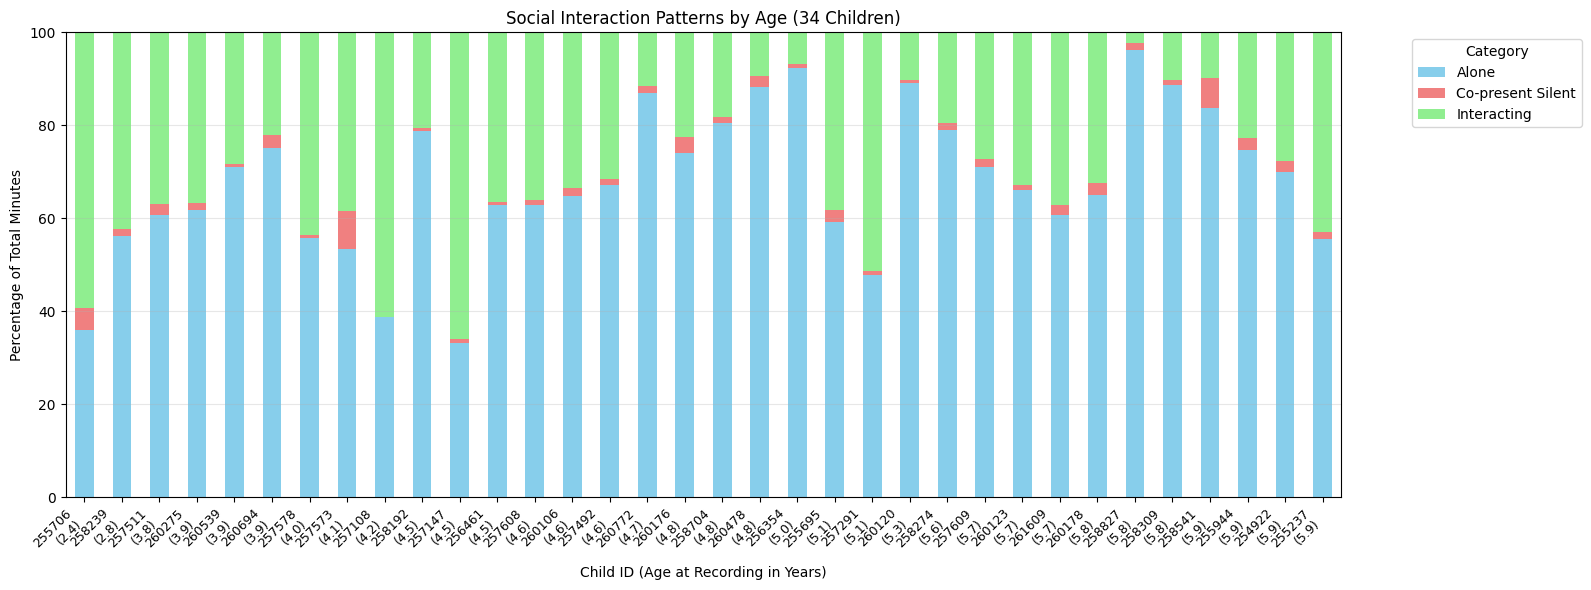


=== AGE STATISTICS ===
Age range: 2.4 - 5.9 years
Mean age: 4.8 years
Median age: 4.8 years


In [10]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Extract child_id from video_name if not already present ---
def extract_child_id(video_name):
    match = re.search(r'id(\d{6})', video_name)
    return match.group(1) if match else None

segments_df['child_id'] = segments_df['video_name'].apply(extract_child_id)

# --- Step 2: Load the CSV with age info ---
age_df = pd.read_csv("/home/nele_pauline_suffo/ProcessedData/age_group.csv")
# Keep only first occurrence of each child_id
age_df = age_df.drop_duplicates(subset='child_id', keep='first')[['child_id', 'age_at_recording']]

# Ensure both are strings
segments_df['child_id'] = segments_df['child_id'].astype(str)
age_df['child_id'] = age_df['child_id'].astype(str)

# --- Step 3: Aggregate duration per child and category ---
duration_by_child_category = (
    segments_df.groupby(['child_id', 'category'])['duration_sec']
    .sum()
    .unstack(fill_value=0) / 60  # convert to minutes
)

# Convert to percentages per child
duration_by_child_category_pct = duration_by_child_category.div(duration_by_child_category.sum(axis=1), axis=0) * 100

# --- Step 4: Only merge with children that have segment data ---
print(f"Children in segments_df: {len(duration_by_child_category)}")
print(f"Children in age_df: {len(age_df)}")

# Only keep age data for children that have segments
children_with_segments = set(duration_by_child_category.index)
age_df_filtered = age_df[age_df['child_id'].isin(children_with_segments)]

print(f"Children with both segment and age data: {len(age_df_filtered)}")
print(f"Missing age data for children: {children_with_segments - set(age_df_filtered['child_id'])}")

# Get a mapping from child_id to age
child_age_map = age_df_filtered.set_index('child_id')['age_at_recording']

# Sort child_ids by age (only those that exist in both datasets)
common_children = child_age_map.index.intersection(duration_by_child_category.index)
child_age_map = child_age_map.loc[common_children]
duration_by_child_category_pct = duration_by_child_category_pct.loc[common_children]

# Sort by age
sorted_children = child_age_map.sort_values().index
duration_by_child_category_pct = duration_by_child_category_pct.loc[sorted_children]
child_age_map = child_age_map.loc[sorted_children]

print(f"Final analysis includes {len(common_children)} children")

# --- Step 5: Plot with age on x-axis and child_ids as tick labels ---
fig, ax = plt.subplots(figsize=(16, 6))
duration_by_child_category_pct.plot(kind='bar', stacked=True, ax=ax, 
                                   color=['skyblue', 'lightcoral', 'lightgreen'])

# Replace x-ticks with child_id + age
xtick_labels = [f"{cid}\n({child_age_map[cid]:.1f})" for cid in duration_by_child_category_pct.index]
ax.set_xticks(range(len(duration_by_child_category_pct)))
ax.set_xticklabels(xtick_labels, rotation=45, ha='right', fontsize=9)

ax.set_ylabel('Percentage of Total Minutes')
ax.set_xlabel('Child ID (Age at Recording in Years)')
ax.set_title(f'Social Interaction Patterns by Age ({len(common_children)} Children)')
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_ylim(0, 100)

# Add grid for better readability
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n=== AGE STATISTICS ===")
print(f"Age range: {child_age_map.min():.1f} - {child_age_map.max():.1f} years")
print(f"Mean age: {child_age_map.mean():.1f} years")
print(f"Median age: {child_age_map.median():.1f} years")


# punkt hat größe der Länge der Videos
# nur alone werte auf x-achse -> alter 


#zweiter plit: gleiche x achse, y achse: number of words (zwei punkte (alone und not alone) )

In [14]:
age_df_filtered.to_csv("/home/nele_pauline_suffo/projects/naturalistic-social-analysis/src/results/rq_01/age_data_filtered.csv", index=False)

In [7]:
import sqlite3
import pandas as pd
import numpy as np

# --- Load vocalizations table ---
db_path = '/home/nele_pauline_suffo/outputs/quantex_inference/inference.db'
conn = sqlite3.connect(db_path)
vocalizations_df = pd.read_sql("SELECT * FROM Vocalizations WHERE speaker = 'KCHI'", conn)
conn.close()

print(f"Loaded {len(vocalizations_df)} KCHI utterances")
print(f"Columns available: {list(vocalizations_df.columns)}")
print(f"Sample data:")
print(vocalizations_df.head())

# --- Prepare segments_df for lookup ---
segments_lookup = segments_df[["video_id", "start_time_sec", "end_time_sec", "category", "child_id"]].copy()

def assign_category(row):
    """
    Assigns social category to each vocalization based on temporal overlap with segments.
    
    Logic:
    1. Find all segments in the same video that temporally overlap with the utterance
    2. Calculate the overlap duration for each overlapping segment
    3. Assign the category of the segment with the maximum overlap
    
    Temporal overlap condition:
    - Utterance: [start_time, end_time]
    - Segment: [start_time_sec, end_time_sec]
    - Overlap exists if: utterance_end > segment_start AND utterance_start < segment_end
    
    Args:
        row: Vocalization row with video_id, start_time, end_time
        
    Returns:
        pd.Series: {'category': dominant_category, 'child_id': corresponding_child_id}
    """
    vid = row['video_id']
    utterance_start = row['start_time']
    utterance_end = row['end_time']
    
    # Find overlapping segments
    overlapping_segments = segments_lookup[
        (segments_lookup['video_id'] == vid) &
        (segments_lookup['end_time_sec'] > utterance_start) &      # Segment ends after utterance starts
        (segments_lookup['start_time_sec'] < utterance_end)        # Segment starts before utterance ends
    ].copy()
    
    if overlapping_segments.empty:
        return pd.Series({'category': 'unknown', 'child_id': np.nan})
    
    # Calculate overlap duration for each segment
    overlapping_segments['overlap_duration'] = overlapping_segments.apply(
        lambda seg: max(0, 
                       min(utterance_end, seg['end_time_sec']) -           # End of overlap
                       max(utterance_start, seg['start_time_sec'])         # Start of overlap
                       ), 
        axis=1
    )
    
    # Find segment with maximum overlap
    max_overlap_idx = overlapping_segments['overlap_duration'].idxmax()
    dominant_segment = overlapping_segments.loc[max_overlap_idx]
    
    return pd.Series({
        'category': dominant_segment['category'], 
        'child_id': dominant_segment['child_id']
    })

# Assign category and child_id to each utterance
print("\nAssigning social categories to utterances...")
vocalizations_df[['category', 'child_id']] = vocalizations_df.apply(assign_category, axis=1)

# Check if 'words' column exists, otherwise use word count from utterance
if 'words' in vocalizations_df.columns:
    print("Using existing 'words' column")
    word_column = 'words'
else:
    print("'words' column not found, counting words from 'utterance' column")
    vocalizations_df['word_count'] = vocalizations_df['utterance'].str.split().str.len()
    word_column = 'word_count'

# --- Aggregate: total words per category ---
words_by_category = vocalizations_df.groupby('category')[word_column].sum()
words_by_child_cat = vocalizations_df.groupby(['child_id', 'category'])[word_column].sum().unstack(fill_value=0)

# --- Percentages ---
total_words = vocalizations_df[word_column].sum()
words_by_category_pct = (words_by_category / total_words * 100).round(2)

words_by_child = vocalizations_df.groupby('child_id')[word_column].sum()
words_by_child_cat_pct = words_by_child_cat.div(words_by_child, axis=0).multiply(100).round(2)

# --- Print summary ---
print(f"\n=== ASSIGNMENT RESULTS ===")
print(f"Total utterances: {len(vocalizations_df)}")
print(f"Utterances assigned to categories: {(vocalizations_df['category'] != 'unknown').sum()}")
print(f"Utterances without category: {(vocalizations_df['category'] == 'unknown').sum()}")

print(f"\n=== Total Words by Social Category ===")
print(words_by_category)
print(f"\n=== Percentage of Words by Social Category ===")
print(words_by_category_pct)

print(f"\n=== Words by Child and Category (first 10 children) ===")
print(words_by_child_cat.head(10))

print(f"\n=== Percentage of Words by Child and Category (first 10 children) ===")
print(words_by_child_cat_pct.head(10))

Loaded 50143 KCHI utterances
Columns available: ['vocalization_id', 'video_id', 'speaker', 'start_time_seconds', 'end_time_seconds', 'phonemes', 'syllables', 'words', 'model_id']
Sample data:
   vocalization_id  video_id speaker  start_time_seconds  end_time_seconds  \
0                1         1    KCHI              73.708            81.010   
1                2         1    KCHI              83.865            83.992   
2                3         1    KCHI              88.012            95.749   
3                4         1    KCHI             102.781           103.493   
4                5         1    KCHI             120.493           128.139   

   phonemes  syllables  words  model_id  
0     57.98      29.46  20.05         4  
1      7.72       3.59   2.20         4  
2     44.89      20.21  15.81         4  
3      7.54       3.22   2.24         4  
4     60.41      29.94  20.60         4  

Assigning social categories to utterances...


KeyError: 'start_time'

### Understanding the `assign_category` Function

The `assign_category` function works as follows:

#### **Input:**
- **Vocalization**: `[start_time, end_time]` in seconds
- **Segments**: Multiple segments with `[start_time_sec, end_time_sec]` for the same video

#### **Overlap Detection Logic:**
For an utterance and segment to overlap, **both** conditions must be true:
1. `utterance_end > segment_start` (utterance continues past segment beginning)
2. `utterance_start < segment_end` (utterance starts before segment ends)

#### **Example:**
```
Utterance:  [10.5 -------- 15.2]
Segment A:       [12.0 ----------- 20.0]  ✅ OVERLAPS
Segment B: [5.0 ---- 9.0]                 ❌ No overlap
Segment C:                   [18.0 -- 25.0] ❌ No overlap
```

#### **Overlap Duration Calculation:**
```python
overlap_start = max(utterance_start, segment_start)  # Latest start
overlap_end = min(utterance_end, segment_end)        # Earliest end
overlap_duration = overlap_end - overlap_start       # Duration of overlap
```

#### **Category Assignment:**
- Find all overlapping segments
- Calculate overlap duration for each
- Assign the category of the segment with **maximum overlap**
- If no overlaps found → category = 'unknown'

In [ ]:
# --- DEBUG: Test assign_category function with examples ---
print("=== DEBUGGING assign_category function ===")

# Take first few utterances as examples
if len(vocalizations_df) > 0:
    for i in range(min(3, len(vocalizations_df))):
        row = vocalizations_df.iloc[i]
        vid = row['video_id']
        utterance_start = row['start_time']
        utterance_end = row['end_time']
        
        print(f"\n--- Example {i+1} ---")
        print(f"Utterance: Video {vid}, [{utterance_start:.2f}, {utterance_end:.2f}]")
        print(f"Duration: {utterance_end - utterance_start:.2f} seconds")
        
        # Find overlapping segments
        overlapping_segments = segments_lookup[
            (segments_lookup['video_id'] == vid) &
            (segments_lookup['end_time_sec'] > utterance_start) &
            (segments_lookup['start_time_sec'] < utterance_end)
        ]
        
        print(f"Found {len(overlapping_segments)} overlapping segments:")
        
        if len(overlapping_segments) > 0:
            for idx, seg in overlapping_segments.iterrows():
                overlap_start = max(utterance_start, seg['start_time_sec'])
                overlap_end = min(utterance_end, seg['end_time_sec'])
                overlap_duration = overlap_end - overlap_start
                
                print(f"  Segment: [{seg['start_time_sec']:.2f}, {seg['end_time_sec']:.2f}] - {seg['category']}")
                print(f"    Overlap: [{overlap_start:.2f}, {overlap_end:.2f}] = {overlap_duration:.2f} sec")
        else:
            print("  No overlapping segments found!")
        
        print(f"Assigned category: {row.get('category', 'NOT_YET_ASSIGNED')}")

# Check for potential issues
print(f"\n=== POTENTIAL ISSUES ===")
print(f"Utterances with 'unknown' category: {(vocalizations_df['category'] == 'unknown').sum()}")
print(f"Utterances with missing child_id: {vocalizations_df['child_id'].isna().sum()}")

# Check if vocalization column names match what we expect
print(f"\nVocalization time columns: {[col for col in vocalizations_df.columns if 'time' in col.lower()]}")
print(f"Segment time columns: {[col for col in segments_lookup.columns if 'time' in col.lower()]}")

# Show time ranges
if len(vocalizations_df) > 0:
    print(f"\nVocalization time range: {vocalizations_df['start_time'].min():.2f} - {vocalizations_df['end_time'].max():.2f}")
if len(segments_lookup) > 0:
    print(f"Segment time range: {segments_lookup['start_time_sec'].min():.2f} - {segments_lookup['end_time_sec'].max():.2f}")

In [1]:
import sqlite3
import pandas as pd

# Connect to the database
db_path = '/home/nele_pauline_suffo/ProcessedData/quantex_annotations/annotations.db'
interaction_conn = sqlite3.connect(db_path)

# Define the video IDs you want to filter
video_ids = [5, 6, 7, 8, 11, 23]

# Query annotations with selected columns
query_annotations = f"""
SELECT video_id, image_id, bbox, person_age
FROM annotations
WHERE video_id IN ({', '.join(map(str, video_ids))}) 
AND category_id = 10
AND outside = 0
"""

# Query videos table for file names
query_videos = f"""
SELECT id, file_name
FROM videos
WHERE id IN ({', '.join(map(str, video_ids))})
"""

# Load data into DataFrames
face_detections_gt = pd.read_sql(query_annotations, interaction_conn)
videos_df = pd.read_sql(query_videos, interaction_conn)

# Close the DB connection
interaction_conn.close()

# Merge the two DataFrames on video_id
gt_df = face_detections_gt.merge(videos_df, left_on="video_id", right_on="id", how="left")

# Create combined image_id: file_name + "_" + zero-padded image_id
gt_df["image_id"] = gt_df.apply(lambda row: f"{row['file_name'].replace('.mp4','')}_{int(row['image_id']):06d}", axis=1)

# map person_age infant to child
gt_df["person_age"] = gt_df["person_age"].replace({"infant": "child"})

# Drop the extra 'id' column if not needed
gt_df.drop(columns=["id", "file_name", "video_id"], inplace=True)
gt_df.rename(columns={"bbox": "bbox_gt", "person_age": "person_age_gt"}, inplace=True)

gt_df["gt_idx"] = gt_df.groupby("image_id").cumcount() + 1

gt_df_wide = gt_df.pivot(index="image_id", columns="gt_idx")
gt_df_wide.columns = [f"{col[0]}_{col[1]}" for col in gt_df_wide.columns]
gt_df_wide.reset_index(inplace=True)

print(gt_df_wide.head())

                                        image_id  \
0  quantex_at_home_id255944_2022_03_08_01_000030   
1  quantex_at_home_id255944_2022_03_08_01_000060   
2  quantex_at_home_id255944_2022_03_08_01_000090   
3  quantex_at_home_id255944_2022_03_08_01_000120   
4  quantex_at_home_id255944_2022_03_08_01_000360   

                            bbox_gt_1 bbox_gt_2 bbox_gt_3 person_age_gt_1  \
0   [1911.28, 500.33, 2304.0, 1079.9]       NaN       NaN           adult   
1     [1297.97, 20.78, 1736.4, 575.0]       NaN       NaN           adult   
2     [1927.6, 190.42, 2304.0, 780.5]       NaN       NaN           adult   
3      [2045.0, 66.45, 2304.0, 565.2]       NaN       NaN           adult   
4  [1097.67, 496.01, 1222.22, 645.69]       NaN       NaN           adult   

  person_age_gt_2 person_age_gt_3  
0             NaN             NaN  
1             NaN             NaN  
2             NaN             NaN  
3             NaN             NaN  
4             NaN             NaN  


In [9]:
import json
import pandas as pd
from datetime import datetime

# Load JSON
with open("/home/nele_pauline_suffo/outputs/face_detections/yolo12l_validation_20250822_112418/predictions.json", "r") as f:
    data = json.load(f)

# Convert to DataFrame
df_pred = pd.DataFrame(data)

# Extract video_id and frame_number from image_id
def parse_video_id(image_id):
    # example: quantex_at_home_id255944_2022_03_08_01_000000 return 000000 without trailing zeros
    parts = image_id.split("_")
    # video_id from idXXXXX
    vid = int(parts[3].replace("id", ""))  # "id255944" → 255944
    return vid

def parse_frame_number(image_id):
    # last part is frame number
    return int(image_id.split("_")[-1])

df_pred["frame_number"] = df_pred["image_id"].apply(parse_frame_number)
# filter to only keep predictions with score greater than 0.25
df_pred = df_pred[df_pred["score"] >= 0.25]

# Rename columns
df_pred.rename(columns={"score": "confidence_score", "category_id": "person_age_pred", "bbox": "bbox_pred"}, inplace=True)

# Add extra columns
df_pred["person_age_pred"] = df_pred["person_age_pred"].replace({1: "child", 2: "adult"})
# Reorder columns
final_columns = ["image_id", "bbox_pred", "person_age_pred"]
df_pred = df_pred[final_columns]

df_pred["gt_idx"] = df_pred.groupby("image_id").cumcount() + 1

df_pred_wide = df_pred.pivot(index="image_id", columns="gt_idx")
df_pred_wide.columns = [f"{col[0]}_{col[1]}" for col in df_pred_wide.columns]
df_pred_wide.reset_index(inplace=True)

print(df_pred_wide.head())

                                        image_id  \
0  quantex_at_home_id255944_2022_03_08_01_000030   
1  quantex_at_home_id255944_2022_03_08_01_000060   
2  quantex_at_home_id255944_2022_03_08_01_000090   
3  quantex_at_home_id255944_2022_03_08_01_000120   
4  quantex_at_home_id255944_2022_03_08_01_000360   

                             bbox_pred_1 bbox_pred_2 bbox_pred_3 bbox_pred_4  \
0   [1928.706, 534.306, 375.294, 547.87]         NaN         NaN         NaN   
1   [1292.824, 33.548, 434.423, 543.073]         NaN         NaN         NaN   
2  [1929.726, 192.167, 372.645, 562.045]         NaN         NaN         NaN   
3   [2050.465, 64.385, 253.136, 498.399]         NaN         NaN         NaN   
4   [1113.687, 496.063, 109.06, 156.085]         NaN         NaN         NaN   

  person_age_pred_1 person_age_pred_2 person_age_pred_3 person_age_pred_4  
0             adult               NaN               NaN               NaN  
1             adult               NaN               Na

In [10]:
# join both tables on image_id (outer join)
df_final = df_pred_wide.merge(gt_df_wide, on="image_id", how="outer")

In [11]:
df_final[df_final["bbox_gt_1"].isna()]

,image_id,bbox_pred_1,bbox_pred_2,bbox_pred_3,bbox_pred_4,person_age_pred_1,person_age_pred_2,person_age_pred_3,person_age_pred_4,bbox_gt_1,bbox_gt_2,bbox_gt_3,person_age_gt_1,person_age_gt_2,person_age_gt_3
13,quantex_at_home_id255944_2022_03_08_01_002010,"[2100.492, 1188.071, 86.245, 105.115]",NaN,NaN,NaN,child,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,quantex_at_home_id255944_2022_03_08_01_003690,"[1991.526, 0.33, 125.2, 123.789]",NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,quantex_at_home_id255944_2022_03_08_01_011220,"[127.639, 286.176, 71.385, 75.641]",NaN,NaN,NaN,child,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,quantex_at_home_id255944_2022_03_08_01_011460,"[115.714, 0.0, 1091.078, 425.623]",NaN,NaN,NaN,child,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,quantex_at_home_id255944_2022_03_08_01_011850,"[2002.212, 0.0, 301.549, 530.796]",NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,quantex_at_home_id260275_2022_04_28_01_008310,"[2251.084, 1105.558, 52.916, 172.597]",NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673,quantex_at_home_id260275_2022_04_28_01_009270,"[2248.686, 101.383, 55.314, 189.439]",NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
675,quantex_at_home_id260275_2022_04_28_01_009630,"[2086.594, 0.0, 217.204, 161.988]",NaN,NaN,NaN,child,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
676,quantex_at_home_id260275_2022_04_28_01_010290,"[396.361, 0.0, 745.816, 467.368]",NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
missclassified_df = df_final[
    (df_final["person_age_pred_1"] != df_final["person_age_gt_1"]) &
    df_final["person_age_pred_1"].notna() &
    df_final["person_age_gt_1"].notna() &
    df_final["person_age_gt_2"].isna()
]

In [ ]:
missclassified_df[["image_id", "person_age_pred_1", "persovn_age_gt_1"]]

,image_id,person_age_pred_1,person_age_gt_1
39,quantex_at_home_id255944_2022_03_08_01_003630,adult,child
65,quantex_at_home_id255944_2022_03_08_01_014160,adult,child
109,quantex_at_home_id255944_2022_03_10_01_009660,adult,child
622,quantex_at_home_id260275_2022_04_28_01_001140,child,adult
625,quantex_at_home_id260275_2022_04_28_01_001290,child,adult
629,quantex_at_home_id260275_2022_04_28_01_001560,child,adult
634,quantex_at_home_id260275_2022_04_28_01_001830,child,adult
639,quantex_at_home_id260275_2022_04_28_01_002280,child,adult
640,quantex_at_home_id260275_2022_04_28_01_002340,child,adult
644,quantex_at_home_id260275_2022_04_28_01_002550,child,adult
